In [9]:
import pandas as pd
from fbprophet import Prophet

In [10]:
df = pd.read_csv('./examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [25]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


We fit the model by instantiating a new `Prophet` object. Any settings to the forecasting procedure are passed into the constructor. Then you call its `fit` method and pass in the historical dataframe. Fitting should take 1-5 seconds.

In [20]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
e:\4.sdk\miniconda3_64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Predictions are then made on a dataframe with a column `ds` containing the dates for which a prediciton is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe`. By default it will also include the dates from the history, so we will see the model fit as well

In [21]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


The `predict` method will assign each row in `future` a predicted value which it anmes `yhat`. if you pass in historicla dates, it will provide an in-sample fit. The `forecast` object here is a new dataframe that includes a column `yhat` with the forecast, as wella s columns for components and uncertainty intervals.

In [24]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.202640,7.479781,8.944356
3266,2017-01-16,8.527650,7.815277,9.281238
3267,2017-01-17,8.315045,7.638425,9.062055
3268,2017-01-18,8.147637,7.412575,8.888566
3269,2017-01-19,8.159557,7.422657,8.883026


You can plot the forecast by calling the `Prophet.plot` method and passing in your forecast dataframe.

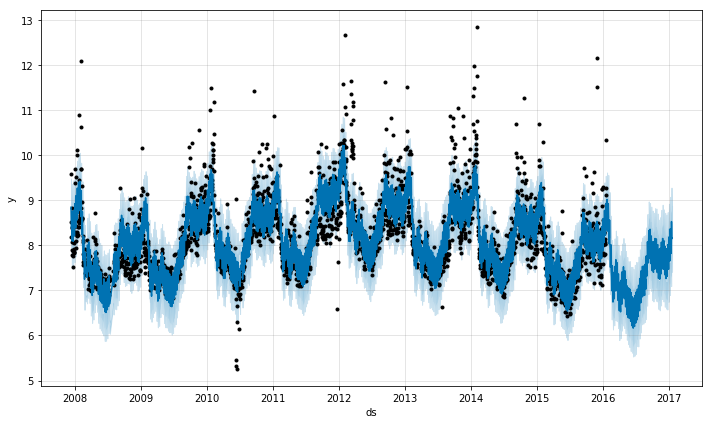

In [27]:
fig1 = m.plot(forecast)
fig1

If you want to see the forecast components, you can use the `Prophet.plot_components` method. By default you'll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you'll see those here, too.

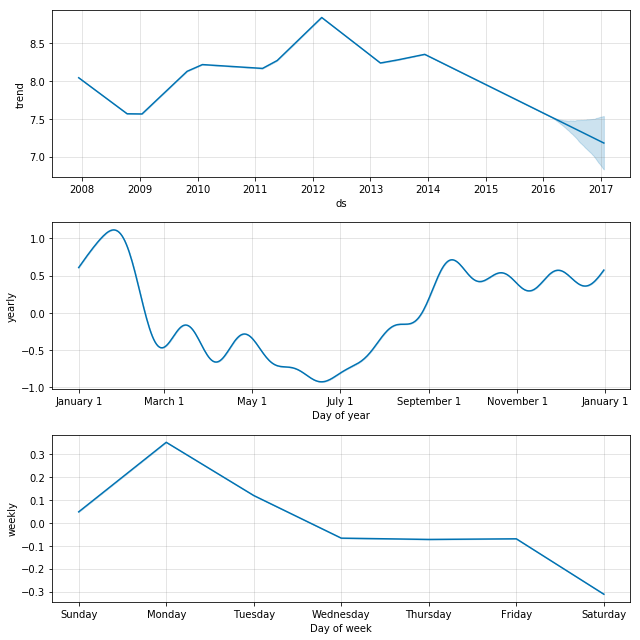

In [29]:
fig2 = m.plot_components(forecast)
fig2

More detail about the options avaiable for ech method are available in the docstrings, for example, via `help(Prophet)` or `help(Prophet.fit)`. The [R reference manual](https://cran.r-project.org/web/packages/prophet/prophet.pdf) on CRAN provides a concise list of all of the available functions, each of which has a Python equivalent